# Processed data validation

## Aim: Acess the following variables, in order to validate the data and eliminate invalid entries.
* ```trip_duration_sec```
* ```trip_distance```
* ```ttl_am_without_tips```
* ```mta_tax```
* ```improvement_surcharge```


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
tlc_df = pd.read_csv('../data/processed/2017_TLC_processed.csv')
print('done')

done


## ```trip_duration_sec```

In [3]:
tlc_df['trip_duration_sec'].describe()

count    22515.000000
mean      1022.083500
std       3692.677195
min      -1019.000000
25%        403.000000
50%        674.000000
75%       1105.000000
max      86373.000000
Name: trip_duration_sec, dtype: float64

In [4]:
tlc_df['trip_duration_sec'].sort_values(ascending = False).head(20)

912      86373.0
15449    86349.0
14872    86331.0
22455    86319.0
15036    86313.0
7868     86308.0
21195    86296.0
6693     86282.0
6438     86270.0
18499    86218.0
6951     86200.0
21247    86190.0
21340    86187.0
8794     86148.0
10835    86107.0
10125    86039.0
18392    85975.0
18273    85924.0
20522    85876.0
5323     85864.0
Name: trip_duration_sec, dtype: float64

Some points od investigation arise from the distribution of trip_duration:
- there are negative duration in the dataset
- there are major outliers with rides of almost one day long
- there are some trips with short durations, even below one minute.

Investigating the negative values, we find that there is only one trip with negative duration values. This trip will be deleted from the dataframe in the code cells below:

In [5]:
mask = tlc_df['trip_duration_sec'] < 0
tlc_df[mask]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,weekday_str,weekday,trip_duration_sec,ttl_am_without_tips
9276,93542707,1,2017-11-05 01:23:08,2017-11-05 01:06:09,1,5.7,1,N,161,157,...,0.0,0.0,0.3,29.3,11,2017,Sun,6,-1019.0,29.3


In [6]:
tlc_df = tlc_df.drop(tlc_df[mask].index)

The next steps will involve: 
- plot a boxplot to observe grafically how the outliers might skew the results.
- delete outliers from ```tlc_df``` using zcores absolute values greater than


The following pattern was found among some outliers: they end at 00\:00:00 of the day after the ride was initiated. Is is probably due some entry error in the ```tpep_dropoff_datetime``` columns

In [7]:
tlc_df['tpep_dropoff_datetime'] = pd.to_datetime(tlc_df['tpep_dropoff_datetime'])
mask = (tlc_df['tpep_dropoff_datetime'].dt.hour == 0) & (tlc_df['tpep_dropoff_datetime'].dt.minute == 0) & (tlc_df['tpep_dropoff_datetime'].dt.second == 0)
tlc_df[mask]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,weekday_str,weekday,trip_duration_sec,ttl_am_without_tips
28,94052446,2,2017-11-06 20:30:50,2017-11-07,1,30.83,1,N,132,23,...,18.56,11.52,0.3,111.38,11,2017,Mon,0,12550.0,92.82
5008,66923363,2,2017-08-07 18:27:53,2017-08-08,1,14.35,1,N,132,33,...,10.46,0.00,0.3,62.76,8,2017,Mon,0,19927.0,52.30
8124,10180941,2,2017-02-12 02:21:07,2017-02-13,1,1.95,1,N,107,79,...,0.00,0.00,0.3,14.80,2,2017,Sun,6,77933.0,14.80
11784,21680369,2,2017-03-16 11:43:57,2017-03-17,1,7.53,1,N,138,170,...,11.37,5.54,0.3,68.21,3,2017,Thu,3,44163.0,56.84
13106,170966,2,2017-01-08 12:30:07,2017-01-09,1,12.53,1,N,163,138,...,8.47,5.54,0.3,50.81,1,2017,Sun,6,41393.0,42.34


In [8]:
tlc_df = tlc_df.drop(tlc_df[mask].index)

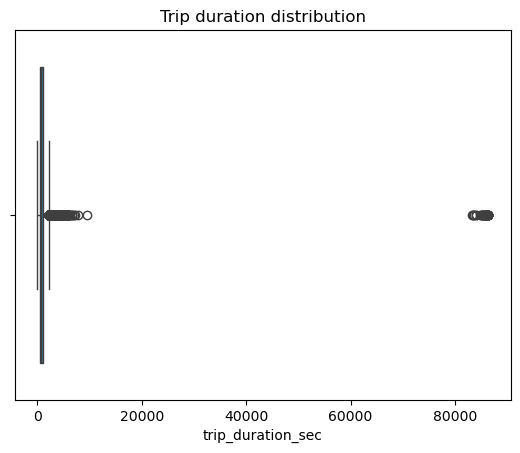

In [9]:
box = sns.boxplot(x = tlc_df['trip_duration_sec'])
plt.title('Trip duration distribution');

In [10]:
tlc_df['zcore_td'] = stats.zscore(tlc_df['trip_duration_sec'])
mask = tlc_df['zcore_td'].map(lambda x: np.absolute(x)) > 5
tlc_df = tlc_df.drop(tlc_df[mask].index)
tlc_df.describe()

,Unnamed: 0,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,weekday,trip_duration_sec,ttl_am_without_tips,zcore_td
count,2.246900e+04,22469.000000,22469,22469.000000,22469.000000,22469.000000,22469.000000,22469.000000,22469.000000,22469.000000,...,22469.000000,22469.000000,2.246900e+04,22469.000000,22469.000000,22469.0,22469.000000,22469.000000,22469.000000,22469.000000
mean,5.675841e+07,1.556367,2017-06-29 08:07:47.515554816,1.642841,2.916533,1.026392,162.343406,161.368374,1.333304,12.823935,...,1.815006,0.300096,3.000000e-01,16.077474,6.422627,2017.0,3.025012,863.224131,14.262469,-0.041417
min,1.212700e+04,1.000000,2017-01-01 00:17:20,0.000000,0.010000,1.000000,4.000000,1.000000,1.000000,2.500000,...,0.000000,0.000000,3.000000e-01,3.300000,1.000000,2017.0,0.000000,1.000000,3.300000,-0.278746
25%,2.854340e+07,1.000000,2017-03-30 02:37:27,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,...,0.000000,0.000000,3.000000e-01,8.750000,3.000000,2017.0,1.000000,403.000000,7.800000,-0.168095
50%,5.676240e+07,2.000000,2017-06-23 13:50:11,1.000000,1.620000,1.000000,162.000000,162.000000,1.000000,9.500000,...,1.360000,0.000000,3.000000e-01,11.800000,6.000000,2017.0,3.000000,672.000000,10.300000,-0.094052
75%,8.537101e+07,2.000000,2017-10-02 10:07:42,2.000000,3.070000,1.000000,233.000000,233.000000,2.000000,14.500000,...,2.450000,0.000000,3.000000e-01,17.800000,10.000000,2017.0,5.000000,1100.000000,15.800000,0.023756
max,1.134863e+08,2.000000,2017-12-31 23:49:24,6.000000,32.720000,4.000000,265.000000,265.000000,4.000000,131.000000,...,55.500000,19.100000,3.000000e-01,179.060000,12.000000,2017.0,6.000000,9559.000000,131.800000,2.352110
std,3.273527e+07,0.496824,NaN,1.286092,3.624705,0.176427,66.574181,70.030327,0.492009,10.422081,...,2.391461,1.346987,5.551239e-17,12.978279,3.463965,0.0,1.951385,692.894840,11.369776,0.190720


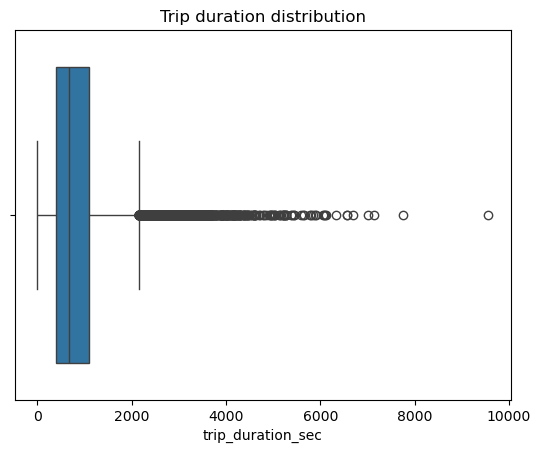

In [11]:
box = sns.boxplot(x = tlc_df['trip_duration_sec'])
plt.title('Trip duration distribution');

At last. the next step will be investigate short trips.
Given the nature of a taxi trip, trips with < 60s of duration and with the same LocationID for ```DOLocationID``` and ```DOLocationID``` will be eliminated


In [12]:
mask = (tlc_df['trip_duration_sec'] < 60) & (tlc_df['DOLocationID'] == tlc_df['PULocationID']) 
tlc_df[mask].sort_values('trip_duration_sec', ascending = False)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,year,weekday_str,weekday,trip_duration_sec,ttl_am_without_tips,zcore_td
2143,48642548,1,2017-06-05 05:37:30,2017-06-05 05:38:29,1,0.30,1,N,151,151,...,0.0,0.3,4.30,6,2017,Mon,0,59.0,4.3,-0.262781
159,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,...,0.0,0.3,52.80,11,2017,Sat,5,58.0,52.8,-0.263057
19478,97062771,2,2017-11-16 01:47:57,2017-11-16 01:48:55,5,0.38,1,N,263,263,...,0.0,0.3,4.30,11,2017,Thu,3,58.0,4.3,-0.263057
15459,54555970,2,2017-06-26 18:55:04,2017-06-26 18:56:00,6,0.25,1,N,113,113,...,0.0,0.3,5.52,6,2017,Mon,0,56.0,4.8,-0.263607
6643,71953966,1,2017-08-26 07:33:22,2017-08-26 07:34:18,1,0.10,1,N,231,231,...,0.0,0.3,3.30,8,2017,Sat,5,56.0,3.3,-0.263607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,107141314,1,2017-12-17 20:35:28,2017-12-17 20:35:31,1,10.00,1,N,132,132,...,0.0,0.3,3.80,12,2017,Sun,6,3.0,3.8,-0.278196
13646,34602353,1,2017-04-29 03:14:50,2017-04-29 03:14:53,1,6.40,3,N,152,152,...,0.0,0.3,20.80,4,2017,Sat,5,3.0,20.8,-0.278196
13193,39596850,1,2017-05-16 18:30:45,2017-05-16 18:30:47,1,8.40,1,N,264,264,...,0.0,0.3,4.30,5,2017,Tue,1,2.0,4.3,-0.278471
21422,30477355,1,2017-04-14 21:18:30,2017-04-14 21:18:32,1,1.20,1,N,186,186,...,0.0,0.3,3.80,4,2017,Fri,4,2.0,3.8,-0.278471


In [13]:
tlc_df = tlc_df.drop(tlc_df[mask].index)

All trips with less than 30s of duration will also be eliminated.

In [14]:
mask = (tlc_df['trip_duration_sec'] < 30)
tlc_df[mask].sort_values('trip_duration_sec', ascending = False)
tlc_df = tlc_df.drop(tlc_df[mask].index)
tlc_df.describe()

,Unnamed: 0,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,weekday,trip_duration_sec,ttl_am_without_tips,zcore_td
count,2.239700e+04,22397.000000,22397,22397.000000,22397.000000,22397.000000,22397.000000,22397.000000,22397.000000,22397.000000,...,22397.000000,22397.000000,2.239700e+04,22397.000000,22397.000000,22397.0,22397.000000,22397.000000,22397.000000,22397.000000
mean,5.674167e+07,1.556235,2017-06-29 07:41:39.515470848,1.643524,2.922576,1.025896,162.289771,161.361879,1.331071,12.830580,...,1.816258,0.300289,3.000000e-01,16.085269,6.421976,2017.0,3.025852,865.921507,14.269011,-0.040675
min,1.212700e+04,1.000000,2017-01-01 00:17:20,0.000000,0.010000,1.000000,4.000000,1.000000,1.000000,2.500000,...,0.000000,0.000000,3.000000e-01,3.300000,1.000000,2017.0,0.000000,45.000000,3.300000,-0.266635
25%,2.852024e+07,1.000000,2017-03-30 02:23:16,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,...,0.000000,0.000000,3.000000e-01,8.750000,3.000000,2017.0,1.000000,405.000000,7.800000,-0.167544
50%,5.674531e+07,2.000000,2017-06-23 13:50:11,1.000000,1.630000,1.000000,162.000000,162.000000,1.000000,9.500000,...,1.360000,0.000000,3.000000e-01,11.800000,6.000000,2017.0,3.000000,674.000000,10.300000,-0.093502
75%,8.532451e+07,2.000000,2017-10-02 08:59:19,2.000000,3.080000,1.000000,233.000000,233.000000,2.000000,14.500000,...,2.450000,0.000000,3.000000e-01,17.800000,10.000000,2017.0,5.000000,1103.000000,15.800000,0.024581
max,1.134863e+08,2.000000,2017-12-31 23:49:24,6.000000,32.720000,4.000000,265.000000,265.000000,4.000000,131.000000,...,55.500000,19.100000,3.000000e-01,179.060000,12.000000,2017.0,6.000000,9559.000000,131.800000,2.352110
std,3.273071e+07,0.496839,NaN,1.286546,3.626680,0.174885,66.575364,70.046640,0.489217,10.389676,...,2.385370,1.347567,5.551239e-17,12.943742,3.463308,0.0,1.950999,692.369028,11.339112,0.190576


## ```trip_distance```
Given the code blocks below, extremely short trips can be identified. 

In [15]:
tlc_df['trip_distance'].describe()

count    22397.000000
mean         2.922576
std          3.626680
min          0.010000
25%          1.000000
50%          1.630000
75%          3.080000
max         32.720000
Name: trip_distance, dtype: float64

In [16]:
tlc_df['trip_distance'].sort_values(ascending = False).head(20)

6012     32.72
10205    31.95
17982    30.50
5741     30.33
15221    28.23
10216    28.20
2570     27.97
20448    27.88
1889     27.34
20382    27.20
4101     26.86
15042    26.54
1480     26.39
7154     26.20
897      26.12
19330    26.12
4675     25.86
3110     25.80
3084     25.70
409      25.69
Name: trip_distance, dtype: float64

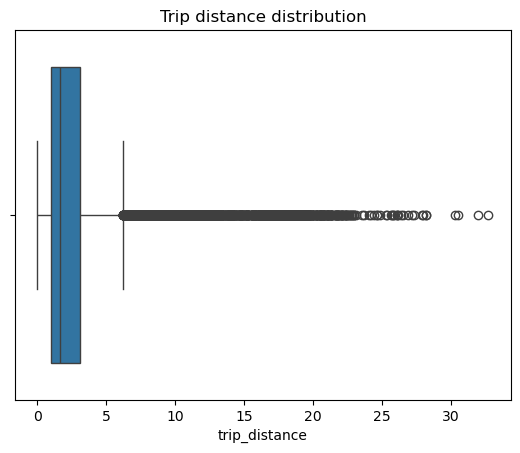

In [17]:
box = sns.boxplot(x = tlc_df['trip_distance'])
plt.title('Trip distance distribution');

Trips which distances are below 0.1 miles will be eliminated

In [18]:
mask = (tlc_df['trip_distance'] < 0.1) 
tlc_df = tlc_df.drop(tlc_df[mask].index)
tlc_df.describe()

,Unnamed: 0,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,weekday,trip_duration_sec,ttl_am_without_tips,zcore_td
count,2.238400e+04,22384.000000,22384,22384.000000,22384.000000,22384.000000,22384.000000,22384.000000,22384.000000,22384.000000,...,22384.000000,22384.000000,2.238400e+04,22384.000000,22384.000000,22384.0,22384.000000,22384.000000,22384.000000,22384.000000
mean,5.673656e+07,1.555977,2017-06-29 07:11:20.156049152,1.643361,2.924245,1.025733,162.289403,161.353467,1.330727,12.830616,...,1.816790,0.299949,3.000000e-01,16.085625,6.421283,2017.0,3.025599,866.307854,14.268835,-0.040569
min,1.212700e+04,1.000000,2017-01-01 00:17:20,0.000000,0.100000,1.000000,4.000000,1.000000,1.000000,2.500000,...,0.000000,0.000000,3.000000e-01,3.300000,1.000000,2017.0,0.000000,45.000000,3.300000,-0.266635
25%,2.851877e+07,1.000000,2017-03-30 02:21:30.249999872,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,...,0.000000,0.000000,3.000000e-01,8.750000,3.000000,2017.0,1.000000,405.000000,7.800000,-0.167544
50%,5.673222e+07,2.000000,2017-06-23 12:53:38,1.000000,1.630000,1.000000,162.000000,162.000000,1.000000,9.500000,...,1.360000,0.000000,3.000000e-01,11.800000,6.000000,2017.0,3.000000,675.000000,10.300000,-0.093226
75%,8.531564e+07,2.000000,2017-10-02 08:17:58.750000128,2.000000,3.080000,1.000000,233.000000,233.000000,2.000000,14.500000,...,2.450000,0.000000,3.000000e-01,17.800000,10.000000,2017.0,5.000000,1103.000000,15.800000,0.024581
max,1.134863e+08,2.000000,2017-12-31 23:49:24,6.000000,32.720000,4.000000,265.000000,265.000000,4.000000,131.000000,...,55.500000,19.100000,3.000000e-01,179.060000,12.000000,2017.0,6.000000,9559.000000,131.800000,2.352110
std,3.272696e+07,0.496868,NaN,1.286331,3.627071,0.174194,66.576908,70.055978,0.488835,10.384242,...,2.384775,1.346953,5.551239e-17,12.937110,3.462897,0.0,1.950836,692.360993,11.332830,0.190574


## ```ttl_am_without_tips```

Given the code cells below, the total amounts show reasonable total amounts for the rides.

In [19]:
tlc_df['ttl_am_without_tips'].describe()

count    22384.000000
mean        14.268835
std         11.332830
min          3.300000
25%          7.800000
50%         10.300000
75%         15.800000
max        131.800000
Name: ttl_am_without_tips, dtype: float64

In [20]:
tlc_df.sort_values(by = 'ttl_am_without_tips', ascending = False).head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,year,weekday_str,weekday,trip_duration_sec,ttl_am_without_tips,zcore_td
10205,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,...,0.00,0.3,131.80,9,2017,Mon,0,2274.0,131.80,0.346901
6012,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,...,16.26,0.3,179.06,6,2017,Tue,1,4049.0,123.56,0.835473
11510,107690629,2,2017-12-19 17:00:56,2017-12-19 18:41:56,2,23.00,3,N,151,1,...,12.50,0.3,123.30,12,2017,Tue,1,6060.0,113.30,1.389004
897,25075013,2,2017-03-27 13:01:38,2017-03-27 13:38:44,2,26.12,4,N,138,265,...,5.76,0.3,121.56,3,2017,Mon,0,2226.0,106.56,0.333689
17982,90375786,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,1,N,132,220,...,8.16,0.3,119.31,10,2017,Thu,3,5268.0,99.46,1.171005
16566,36151064,1,2017-04-28 09:07:13,2017-04-28 09:55:53,1,21.70,3,N,161,1,...,18.28,0.3,98.08,4,2017,Fri,4,2920.0,98.08,0.524714
312,61694138,2,2017-07-20 13:21:55,2017-07-20 14:21:20,1,17.86,3,N,170,1,...,16.50,0.3,94.80,7,2017,Thu,3,3565.0,94.80,0.702251
3110,784652,1,2017-01-03 17:21:57,2017-01-03 18:25:04,2,25.80,4,N,132,265,...,5.54,0.3,92.84,1,2017,Tue,1,3787.0,92.84,0.763357
16970,21925418,2,2017-03-17 05:21:30,2017-03-17 05:52:41,1,22.03,3,N,233,1,...,16.00,0.3,102.80,3,2017,Fri,4,1871.0,92.80,0.235975
18736,93297612,2,2017-11-04 12:22:33,2017-11-04 13:08:19,6,17.98,3,N,230,1,...,18.00,0.3,110.16,11,2017,Sat,5,2746.0,91.80,0.476820


### ```mta_tax```
It is expected that improvement surcharge for all rides has the value of \$0.50. The code cells below shows that there are zero-ed mta_taxes. These values will be corrected in ```ttl_am_without_tips``` and ```ttl_am_without_tips``` columns.

In [21]:
tlc_df['mta_tax'].describe()

count    22384.000000
mean         0.499174
std          0.020312
min          0.000000
25%          0.500000
50%          0.500000
75%          0.500000
max          0.500000
Name: mta_tax, dtype: float64

In [22]:
mask = tlc_df['mta_tax'] == 0
tlc_df[mask].head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,year,weekday_str,weekday,trip_duration_sec,ttl_am_without_tips,zcore_td
62,83622942,2,2017-10-05 09:39:28,2017-10-05 09:42:32,6,0.22,3,N,48,48,...,0.0,0.3,21.8,10,2017,Thu,3,184.0,21.8,-0.228375
174,50046493,2,2017-06-13 20:05:03,2017-06-13 20:42:53,1,18.05,3,N,163,1,...,10.5,0.3,80.8,6,2017,Tue,1,2270.0,80.8,0.345800
312,61694138,2,2017-07-20 13:21:55,2017-07-20 14:21:20,1,17.86,3,N,170,1,...,16.5,0.3,94.8,7,2017,Thu,3,3565.0,94.8,0.702251
2456,84886663,1,2017-10-09 10:33:25,2017-10-09 11:08:03,1,20.50,3,N,166,1,...,15.0,0.3,98.3,10,2017,Mon,0,2078.0,88.3,0.292952
3175,86846839,2,2017-10-15 11:10:52,2017-10-15 11:39:06,6,16.86,3,N,68,265,...,12.5,0.3,75.8,10,2017,Sun,6,1694.0,75.8,0.187255


In [23]:
tlc_df['mta_tax'] = 0.5 

## ```improvement_surcharge```
It is expected that improvement surcharge for all rides has the value of \$0.30, which is confirmed in the code chunk below.

In [24]:
tlc_df['improvement_surcharge'].describe().round(2)

count    22384.0
mean         0.3
std          0.0
min          0.3
25%          0.3
50%          0.3
75%          0.3
max          0.3
Name: improvement_surcharge, dtype: float64

## Recalculation of ```'total_amount'``` and ```'ttl_am_without_tips'```

In [25]:
tlc_df['total_amount'] = (tlc_df['fare_amount'] + tlc_df['extra'] + tlc_df['mta_tax'] + tlc_df['tip_amount'] + tlc_df['tip_amount'] + tlc_df['tolls_amount'] + tlc_df['improvement_surcharge']).round(2)
tlc_df['ttl_am_without_tips'] = (tlc_df['total_amount'] - tlc_df['tip_amount']).round(2)

## New field: Fixed taxes (```'mta_tax'``` + ```'improvement_surcharge'```)

In [26]:
tlc_df['fixed_taxes'] = (tlc_df['mta_tax'] + tlc_df['improvement_surcharge']).round(2)

## Saving new datasets

### Full Data Set
The full cleaned data set will be saved using the code block below.

In [27]:
tlc_df.to_csv('../data/cleaned/2017_TLC_cleaned.csv', index=False)
print('done')

done


### Data set with selected columns
The data set with selected columns is created and stored in the code blocks below.

In [28]:
useful_col = tlc_df[['year', 'month', 'weekday', 'weekday_str', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration_sec', 'trip_distance', 'PULocationID', 'DOLocationID', 'RatecodeID', 'payment_type', 'fare_amount', 'extra', 'tolls_amount', 'fixed_taxes', 'ttl_am_without_tips']] 
useful_col = useful_col.sort_values(by = 'tpep_pickup_datetime')
useful_col

,year,month,weekday,weekday_str,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration_sec,trip_distance,PULocationID,DOLocationID,RatecodeID,payment_type,fare_amount,extra,tolls_amount,fixed_taxes,ttl_am_without_tips
3764,2017,1,6,Sun,2017-01-01 00:08:25,2017-01-01 00:17:20,535.0,0.52,237,161,1,2,7.0,0.5,0.0,0.8,8.30
5447,2017,1,6,Sun,2017-01-01 00:26:35,2017-01-01 00:36:12,577.0,0.90,234,164,1,1,7.5,0.5,0.0,0.8,10.55
3907,2017,1,6,Sun,2017-01-01 00:43:10,2017-01-01 00:57:21,851.0,4.90,261,233,1,2,17.0,0.5,0.0,0.8,18.30
7257,2017,1,6,Sun,2017-01-01 00:47:06,2017-01-01 00:51:45,279.0,0.80,238,151,1,1,5.5,0.5,0.0,0.8,8.16
15507,2017,1,6,Sun,2017-01-01 01:21:59,2017-01-01 01:34:12,733.0,2.10,170,158,1,2,10.0,0.5,0.0,0.8,11.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18903,2017,12,6,Sun,2017-12-31 21:02:51,2017-12-31 21:35:39,1968.0,8.90,138,225,1,1,30.0,0.5,0.0,0.8,37.55
14385,2017,12,6,Sun,2017-12-31 21:02:59,2017-12-31 21:45:52,2573.0,15.70,132,85,1,1,49.0,0.5,0.0,0.8,55.30
12360,2017,12,6,Sun,2017-12-31 21:57:40,2017-12-31 22:15:13,1053.0,1.20,79,114,1,1,11.5,0.5,0.0,0.8,15.35
14132,2017,12,6,Sun,2017-12-31 22:28:54,2017-12-31 22:37:29,515.0,1.50,100,163,1,1,7.5,0.5,0.0,0.8,9.80


In [29]:
useful_col.to_csv('../data/cleaned/2017_TLC_useful_columns.csv', index=False)
print('done')

done
